                            OLS Regression Results                            
Dep. Variable:      Construction_Cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.153e+04
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          1.23e-171
Time:                        21:04:36   Log-Likelihood:                -372.31
No. Observations:                 100   AIC:                             756.6
Df Residuals:                      94   BIC:                             772.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -15

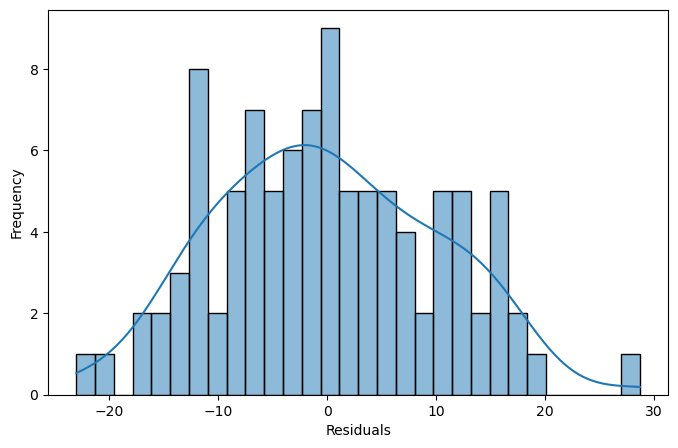

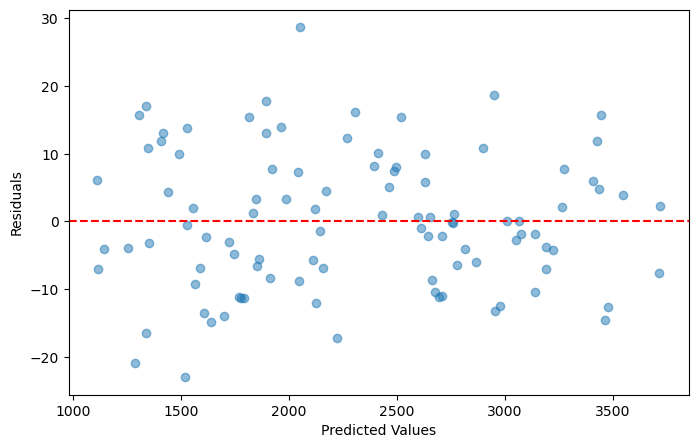

set()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

df = pd.read_csv("Civil_Engineering_Regression_Dataset.csv")

X = df[['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']]
y = df['Construction_Cost']

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
print(model.summary())

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
selected_features = X.columns[lasso.coef_ != 0]
print(list(selected_features))

y_pred = model.predict(X_with_const)
residuals = y - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

z_scores = np.abs(stats.zscore(df[['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth', 'Construction_Cost']]))
outliers = np.where(z_scores > 3)
print(set(outliers[0]))


#### Model Deployment:
- Integrate real-time material cost updates and labor rates.
- Use API connections to fetch economic indicators.
- Allow customization for different project types.

#### Ethical Considerations:
- Overestimating costs could lead to project cancellations.
- Underestimating costs may result in financial losses, delays, or safety risks.
- Ensuring fairness and transparency in cost estimations is critical.